In [1]:
# Logar no colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# dataset jogadores = importação da planilha

import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Desafio1_DIO/Desafio/jogadores.csv")


In [3]:
#Quantidade de linhas e colunas
df.shape

(350, 8)

In [4]:
df = df.rename(columns={"player_name": "Nome_jogador",  "player_api_id": "ID_jogador", "birthday":"DtNasc", "height":"Altura", "weight":"Peso", "age": "Idade"})

In [5]:
df.sample(5)

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade
93,3741,67333,Geoffrey Treand,188230,1986-01-16 00:00:00,1.7780,73.935556,35
150,8032,97363,Nilson,170801,1975-12-26 00:00:00,1.8542,79.832257,45
89,663,38170,Andre Mijatovic,169405,1979-12-03 00:00:00,1.9050,79.832257,41
61,3158,310355,Fabian Holland,208470,1990-07-11 00:00:00,1.7272,73.935556,31
34,9426,187344,Samir Fazli,193880,1991-04-22 00:00:00,1.8542,74.842741,30


In [6]:
#Visualizando as 5 primeiras linhas
df.head()

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038856,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,35


In [7]:
df.sample(5)

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade
215,5222,42707,Joonas Kolkka,100940,1974-09-28 00:00:00,1.7526,69.853225,46
121,2686,164105,Diogo Cunha,203787,1986-02-10 00:00:00,1.7018,59.874193,35
55,3170,41666,Fabiano Santacroce,182177,1986-08-24 00:00:00,1.8034,72.121187,35
329,5170,317771,Jonathan Cristian Silva,215322,1994-06-29 00:00:00,1.7780,72.121187,27
146,10520,42184,Umit Ozat,143659,1976-10-30 00:00:00,1.8542,73.935556,44


In [8]:
nans = df.loc[np.any(df.isna(),axis=1)]
nans

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade


In [9]:
#Total de linhas e colunas
df.shape

(350, 8)

In [10]:
#Tipo de dado de cada coluna
df.dtypes

id                      int64
ID_jogador              int64
Nome_jogador           object
player_fifa_api_id      int64
DtNasc                 object
Altura                float64
Peso                  float64
Idade                   int64
dtype: object

In [ ]:
#Agrupamento por jogador
df.groupby("Nome_jogador")["Idade"].sum()

Nome_jogador
Abdelmalek Cherrad       40
Abdessalam Benjelloun    36
Adalberto Penaranda      24
Adam Marciniak           32
Adam Matthews            29
                         ..
Youssouf Hadji           41
Yuya Kubo                27
Yves Makaba-Makalamby    35
Ze Manuel                46
Zsolt Low                42
Name: Idade, Length: 349, dtype: int64

In [11]:
#Agrupamento da idade X média do peso
df.groupby("Idade")["Peso"].mean()


Idade
22    63.956524
23    78.017888
24    78.017888
25    69.342934
26    72.045588
27    73.838358
28    75.156767
29    74.842741
30    76.815868
31    78.358082
32    76.711542
33    77.700373
34    75.336356
35    77.976652
36    77.881810
37    77.731408
38    76.657111
39    73.368566
40    77.443337
41    79.119469
42    74.489947
43    79.492063
44    79.321966
45    78.925072
46    67.857419
48    92.079251
49    87.996920
Name: Peso, dtype: float64

In [12]:
# média do Peso e idade total
media_peso = df['Peso'].mean()
media_idade = df['Idade'].mean()
print("Média de peso é:", media_peso, "\n","Média de idade é:", media_idade)
print("\n")

Média de peso é: 76.4549379308001 
 Média de idade é: 34.30571428571429




In [13]:
df.describe()

,id,ID_jogador,player_fifa_api_id,Altura,Peso,Idade
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,5588.354286,140858.094286,165443.377143,1.820164,76.454938,34.305714
std,3216.645160,144409.584152,56171.719230,0.060569,6.425071,5.144415
min,27.000000,3264.000000,249.000000,1.651000,58.967008,22.000000
25%,2845.500000,36177.500000,153738.000000,1.778000,72.121187,31.000000
50%,5606.500000,77008.500000,184071.500000,1.828800,76.203518,34.000000
75%,8216.500000,196720.750000,202294.250000,1.854200,81.193034,38.000000
max,11073.000000,689987.000000,232294.000000,1.981200,96.161582,49.000000


In [14]:

df.describe(percentiles=None, include=None, exclude=None)

,id,ID_jogador,player_fifa_api_id,Altura,Peso,Idade
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,5588.354286,140858.094286,165443.377143,1.820164,76.454938,34.305714
std,3216.645160,144409.584152,56171.719230,0.060569,6.425071,5.144415
min,27.000000,3264.000000,249.000000,1.651000,58.967008,22.000000
25%,2845.500000,36177.500000,153738.000000,1.778000,72.121187,31.000000
50%,5606.500000,77008.500000,184071.500000,1.828800,76.203518,34.000000
75%,8216.500000,196720.750000,202294.250000,1.854200,81.193034,38.000000
max,11073.000000,689987.000000,232294.000000,1.981200,96.161582,49.000000


In [15]:
df["Idade"].var()

26.46501023331969

In [20]:
#Calculando o IMC
df["IMC"] = df["Peso"] / df["Altura"]**2
df.head(20)

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,33,21.423173
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038856,29,23.493080
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,35,24.276515
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,42,21.478420
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,35,23.479954
5,6259,67360,Luca Radice,221640,1987-04-09 00:00:00,1.8034,69.853225,34,21.478420
6,3485,37753,Francis Dickoh,130933,1982-12-13 00:00:00,1.8796,84.821773,38,24.009133
7,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,1.8288,78.017888,24,23.327154
8,10862,67941,Xavier Chen,158260,1983-10-05 00:00:00,1.7526,68.946040,37,22.446246
9,3142,199916,Ezequiel Adrian Cirigliano,199666,1992-01-24 00:00:00,1.7272,71.214002,29,23.871523


In [24]:
#Ordenando o conjunto de dados
df.sort_values("IMC", ascending=False).head(10)

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC
284,4421,78411,Ismael Traore,184873,1986-08-18 00:00:00,1.8288,88.904105,35,26.582106
57,3056,23781,Eric Djemba-Djemba,49483,1981-05-04 00:00:00,1.7526,81.193034,40,26.433408
59,9027,23979,Robert Elliot,167931,1986-04-30 00:00:00,1.8796,92.986436,35,26.320172
88,3102,244774,Esmael Goncalves,202557,1991-06-25 00:00:00,1.8288,87.996920,30,26.310860
303,8994,95225,Rinaldo Cruzado,179695,1984-09-21 00:00:00,1.7780,83.007404,36,26.257497
306,941,149584,Ariel Nahuelpan,189451,1987-10-15 00:00:00,1.8796,92.079251,33,26.063390
120,4482,40967,Ivanildo,164851,1986-01-09 00:00:00,1.7526,78.925072,35,25.695044
233,9055,34382,Roberto Abbondanzieri,139036,1972-08-19 00:00:00,1.8542,87.996920,49,25.594952
74,7332,24208,Micah Richards,169721,1988-06-24 00:00:00,1.8034,83.007404,33,25.523058
25,6229,196865,Louis Moult,194925,1992-05-14 00:00:00,1.8288,84.821773,29,25.361499


In [23]:
# Peso máximo, mínino e média da idade.
max_peso = df['Peso'].max()
min_peso = df['Peso'].min()
mean_idade= df['Idade'].mean()
print("O Peso máximo é:", max_peso, "\n","O Peso mínimo é:", min_peso, "\n", "A média de idade é:", mean_idade )
print("\n")

O Peso máximo é: 96.16158244 
 O Peso mínimo é: 58.9670081 
 A média de idade é: 34.30571428571429




In [25]:
#nlargest
df.nlargest(3, "IMC")

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC
284,4421,78411,Ismael Traore,184873,1986-08-18 00:00:00,1.8288,88.904105,35,26.582106
57,3056,23781,Eric Djemba-Djemba,49483,1981-05-04 00:00:00,1.7526,81.193034,40,26.433408
59,9027,23979,Robert Elliot,167931,1986-04-30 00:00:00,1.8796,92.986436,35,26.320172


In [26]:
#nsamllest
df.nsmallest(3, "IMC")

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC
332,8394,112123,Paul Hanlon,189110,1990-01-01 00:00:00,1.8542,63.956524,31,18.602517
125,288,38395,Alberto Cifuentes,110638,1979-05-29 00:00:00,1.8796,67.131671,42,19.001881
259,5183,682552,Jonathan Leko,231408,1999-04-24 00:00:00,1.8288,63.956524,22,19.122842


In [27]:
##Usando funções, para classificaçãoo do IMC

def classificacao_imc(IMC):
    if IMC < 18.5:
        return "Magro"
    elif IMC >= 18.5 and IMC <= 24.9:
        return "Normal"
    elif IMC > 24.9 and IMC < 29.9:
        return "Sobrepeso"
    elif IMC >= 30.0 and IMC  < 39.9:
        return "Obesidade"
    elif IMC >= 40:
        return "Obesidade Grave"

# e então:
df["Classificação"] = df['IMC'].apply(classificacao_imc)

print(df)

        id  ID_jogador           Nome_jogador  ...  Idade        IMC  Classificação
0      530      167285       Alireza Haghighi  ...     33  21.423173         Normal
1     8608      184536      Philippe Coutinho  ...     29  23.493080         Normal
2     7752       38947  Mustapha Jarju Alasan  ...     35  24.276515         Normal
3    11073       36491              Zsolt Low  ...     42  21.478420         Normal
4     8427       27613               Paulinho  ...     35  23.479954         Normal
..     ...         ...                    ...  ...    ...        ...            ...
345  10199        7627            Thierno Bah  ...     38  22.150900         Normal
346   1216      246330         Benjamin Morel  ...     34  21.478420         Normal
347   4262       33793         Hugo Alcantara  ...     42  23.373158         Normal
348   5886      173699              Koro Kone  ...     32  23.674792         Normal
349   7946       26137         Nicolas Gillet  ...     44  24.407557        

In [28]:
#Verificação de jogadores com a classificação do IMC diferente do Normal
df[df['Classificação'] != 'Normal']

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC,Classificação
17,10865,149140,Xavier Luissint,188954,1984-01-13 00:00:00,1.7780,79.832257,37,25.253111,Sobrepeso
25,6229,196865,Louis Moult,194925,1992-05-14 00:00:00,1.8288,84.821773,29,25.361499,Sobrepeso
36,5331,207511,Jose Izquierdo,219411,1992-07-07 00:00:00,1.7018,73.028372,29,25.215906,Sobrepeso
47,4700,37976,Jason Vandelannoite,169170,1986-11-06 00:00:00,1.7780,79.832257,34,25.253111,Sobrepeso
57,3056,23781,Eric Djemba-Djemba,49483,1981-05-04 00:00:00,1.7526,81.193034,40,26.433408,Sobrepeso
59,9027,23979,Robert Elliot,167931,1986-04-30 00:00:00,1.8796,92.986436,35,26.320172,Sobrepeso
74,7332,24208,Micah Richards,169721,1988-06-24 00:00:00,1.8034,83.007404,33,25.523058,Sobrepeso
80,6235,361380,Luan,210373,1988-12-30 00:00:00,1.8288,83.914588,32,25.090253,Sobrepeso
87,5732,142992,Kevin Brands,191077,1988-03-28 00:00:00,1.8542,86.182550,33,25.067221,Sobrepeso
88,3102,244774,Esmael Goncalves,202557,1991-06-25 00:00:00,1.8288,87.996920,30,26.310860,Sobrepeso


In [44]:
#Verificação de jogadores com a classificação do IMC "Obesidade"
query_string = (
    "Classificação != 'Normal'"
    "and Altura < 1.70"
    "and Peso > 60"
)
df.query(query_string)

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC,Classificação


In [47]:
# Outra forma de validar mais simples
# Verificação de jogadores com a classificação do IMC igual a Obesidade

df[df['Classificação'] == 'Obesidade']

,id,ID_jogador,Nome_jogador,player_fifa_api_id,DtNasc,Altura,Peso,Idade,IMC,Classificação


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os
from matplotlib import pyplot as plt


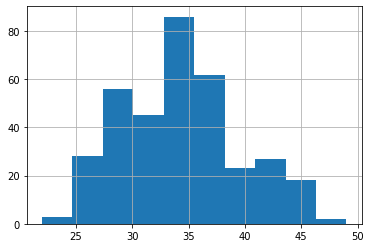

In [42]:
# Verificando a idade

df['Idade'].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


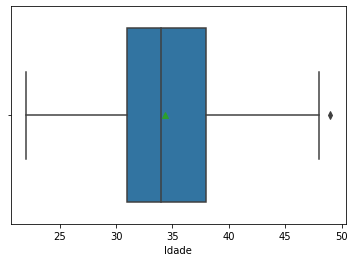

In [43]:
#Verificando a existência de um outlier
import matplotlib.pyplot as plt 
% matplotlib inline
sns.boxplot( df['Idade'], showmeans=True)
